# Projeto 1 - Exemplos

Vamos iniciar com uma visita ao site [https://www.gapminder.org/tools/](https://www.gapminder.org/tools/) para fazer a seleção das séries de dados. 

Procuraremos responder às seguintes perguntas:
* Existe uma associação positiva entre adoção de telefonia celular e produção energética por pessoa dos países?
* Esta associação é mais forte entre os países da Europa versus os demais?

No site do Gapminder, vamos plotar as séries de dados de interesse

<img src=gapminder_howto.png width=60%><>

As variáveis que vamos analisar serão  [Cell phones (per 100 people)](https://data.worldbank.org/indicator/IT.CEL.SETS.P2)  e [Energy use (per capita)](https://data.worldbank.org/indicator/EG.USE.PCAP.KG.OE)

Podemos clicar no `?` que aparece ao lado de cada variável, e seguir a opção *More Info and Source* para encontrar os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Energia

A planiha com os dados de energia se chama `API_EG.USE.PCAP.KG.OE_DS2_en_excel_v2_45848.xls`.  Notamos que ela tem *abas* e que os dados não começam na primeira linha.

Portanto a leitura da mesma vai precisar das opções `sheet_name=Data` para acessar a aba correta e `skiprows=3` para pular 3 linhas antes de chegar nos dados.

Note que você **não deve limpar os dados manualmente** se deseja uma boa nota.

<img src="planilha_energia.png" width=75%></img>

In [2]:
energia_filename = "API_EG.USE.PCAP.KG.OE_DS2_en_excel_v2_45848.xls"
energia_raw = pd.read_excel(energia_filename, sheet_name="Data", skiprows=3)

In [3]:
energia_raw.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,515.217119,520.962358,521.780681,552.363634,533.76101,544.609322,NaN,NaN,NaN,NaN


Mudando os índices:

Precisamos alterar a planilha para que os nomes dos países possam ser usados como índices

In [4]:
energia = energia_raw.set_index("Country Name")

### Plot da média do indicador

Vamos fazer um plot da média da evolução do indicador *Energy use (per capita)* ao longo do tempo

In [5]:
y = energia.mean()
x = y.index


Note que ao usar `mean()` diretamente no objeto do tipo DataFrame `energia`, ele aplica a média a todas as colunas quantitativas de uma só vez

In [6]:
y.head(5)

1960    2318.799627
1961    2351.165588
1962    2448.559497
1963    2579.052548
1964    2683.454619
dtype: float64

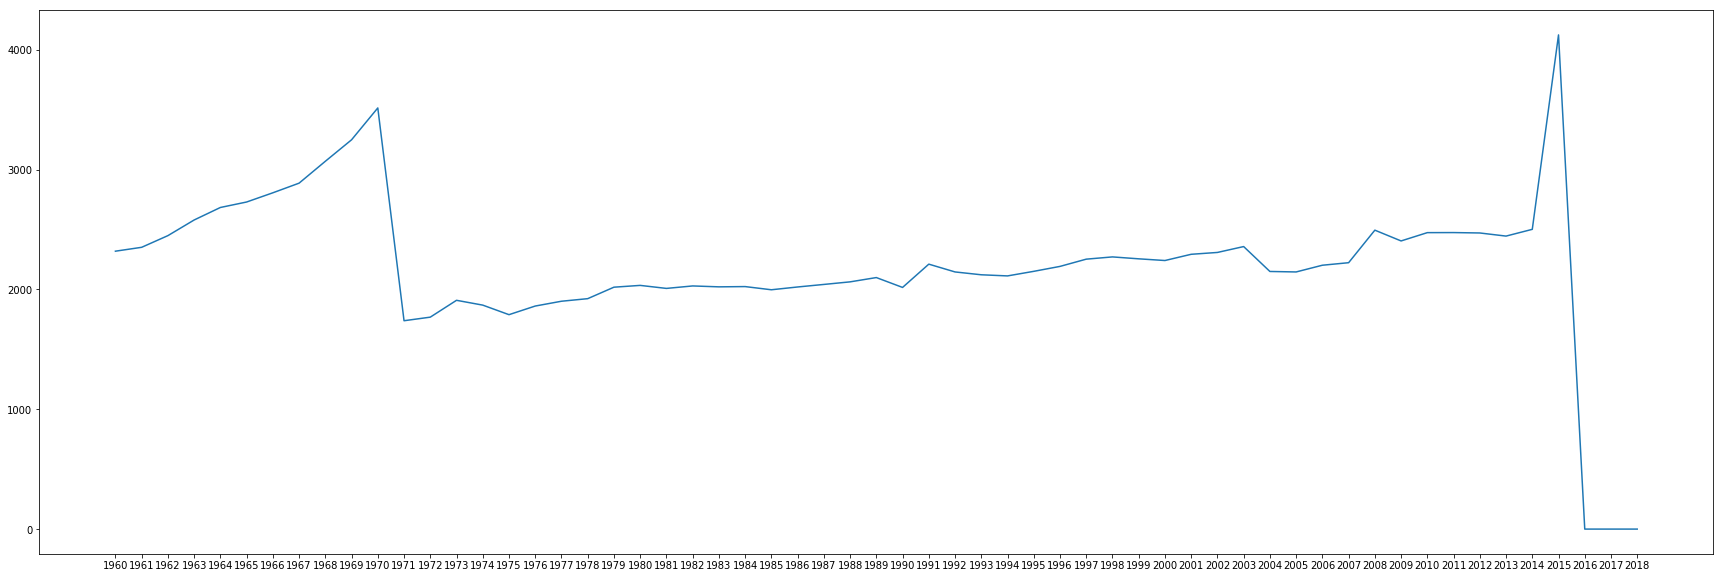

In [7]:
plt.figure(figsize=(30,10))
plt.plot(x,y)

### Plot da dispersão ao estilo *Gapminder*

Se quisermos fazer o plot de todos os países, vamos precisar *transpor* a planilha e manter somente os índices que são numéricos mantendo de $1970$ em diante

In [8]:
energia_anos = energia.loc[:,('1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018')]
#energia_anos = energia
energia_t = energia_anos.T

In [9]:
energia_t.head(3)

Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971,NaN,NaN,637.459055,785.161526,NaN,408.343718,3647.083839,1387.005189,NaN,NaN,...,NaN,297.238324,NaN,1337.003192,NaN,NaN,116.893058,2004.341356,835.864961,993.123768
1972,NaN,NaN,663.452749,865.592481,NaN,412.725682,3175.802329,1387.082272,NaN,NaN,...,NaN,292.983131,NaN,1371.819984,NaN,NaN,90.216309,1984.179676,860.541260,976.557792


Vamos fazer um plot tempo x indicador ao estilo do que vemos no Gapminder

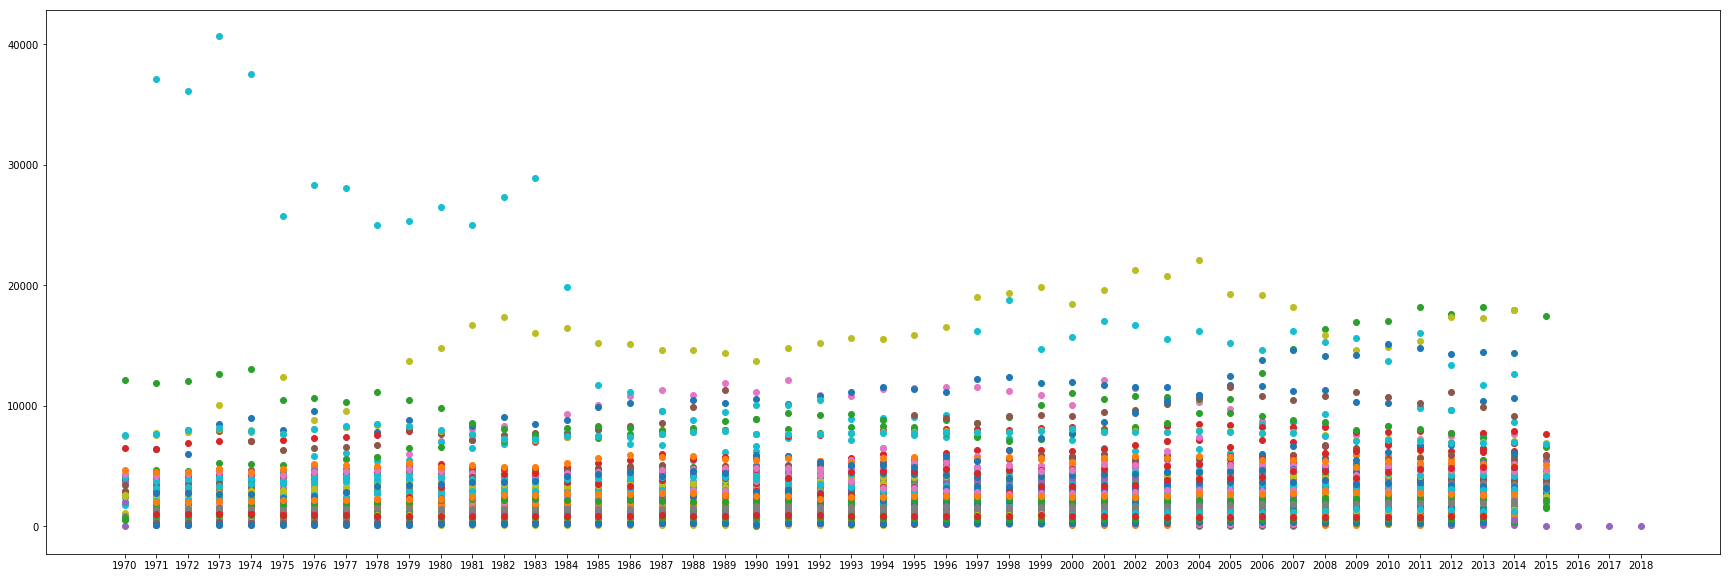

In [10]:
plt.figure(figsize=(30,10))
for pais in energia_t.columns:
    plt.scatter(x=energia_t.index, y=energia_t[pais])

Nota: para fazer o mesmo plot acima usando o método do *pandas* pd.DataFrame.plot.scatter precisaríamos converter o índice de volta em uma coluna usando *energia_t_idx = energia_t.reset_index()* uma vez que este método **não aceita plotar o índice**

## Telefonia celular

De forma equivalente, a variável *Telefonia Celular* está no arquivo `API_IT.CEL.SETS.P2_DS2_en_excel_v2_41568.xls` e precisa dos parâmetros `skiprows` para pular 3 linhas e `sheet_name` para localizar a aba correta

In [11]:
telefonia_filename = "API_IT.CEL.SETS.P2_DS2_en_excel_v2_41568.xls"
telefonia_raw = pd.read_excel(telefonia_filename, sheet_name="Data", skiprows=3)

In [12]:
telefonia_raw.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.0,NaN,NaN,NaN,NaN,0.0,...,126.166796,129.636369,NaN,131.608450,134.513069,134.592225,135.133840,NaN,NaN,NaN
1,Afghanistan,AFG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.0,NaN,NaN,NaN,NaN,0.0,...,37.494200,35.467766,46.444058,49.972753,52.966473,56.191333,58.420528,62.335417,67.350573,NaN


Novamente, precisamos fazer com que o índice seja `Country Name` para que futuros cruzamentos de dados com outras tabelas tenha o mesmo índice.

In [13]:
telefonia = telefonia_raw.set_index("Country Name")

In [14]:
telefonia.head(2)

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.0,NaN,NaN,NaN,NaN,0.0,NaN,...,126.166796,129.636369,NaN,131.608450,134.513069,134.592225,135.133840,NaN,NaN,NaN
Afghanistan,AFG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.0,NaN,NaN,NaN,NaN,0.0,NaN,...,37.494200,35.467766,46.444058,49.972753,52.966473,56.191333,58.420528,62.335417,67.350573,NaN


### Plot de indicadores x média no tempo

Podemos fazer um plot da média do indicador sobre a dispersão. Seguiremos o mesmo que foi feito com o indicador *Energia*. Para montar a lista de anos faremos um `print` de depois um copy-paste escolhendo os anos a partir de `1970`

In [15]:
telefonia.columns

Index(['Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018'],
      dtype='object')

In [16]:
telefonia_datas = ['1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018']

In [17]:
telefonia_anos = telefonia.loc[:, telefonia_datas]

In [18]:
telefonia_anos_t = telefonia_anos.T

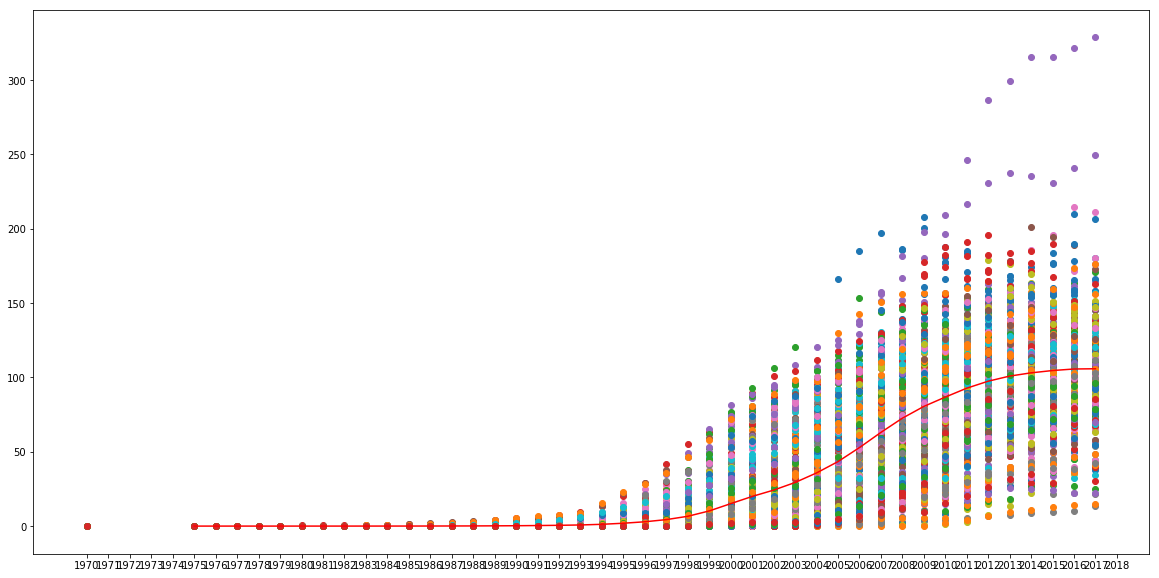

In [19]:
medias_telefonia = telefonia_anos.mean()
plt.figure(figsize=(20,10))
for pais in telefonia_anos_t.columns:
    plt.scatter(x=telefonia_anos_t.index, y=telefonia_anos_t[pais])
plt.plot(medias_telefonia.index,  medias_telefonia, color="r")

## Lista com países da Europa

Note que várias entradas **não são países**, por exemplo *East Asia & Pacific (IDA & IBRD countries)* e *'Upper middle income'*. No seu projeto você deve levar isso em conta e eliminá-los

In [20]:
europa = ['Andorra',  'Austria', 'Belgium', 'Bulgaria', 'Bosnia and Herzegovina',  'Channel Islands',  'Cyprus',  'Czech Republic',  'Germany',
 'Denmark', 'Spain',  'Estonia', 'Finland',  'France', 'Faroe Islands', 'United Kingdom',  'Gibraltar',  'Greece', 'Croatia', 'Hungary',
 'Isle of Man', 'Ireland',  'Iceland',  'Italy',  'Liechtenstein',  'Lithuania', 'Latvia',  'Monaco',  'Moldova',  'North Macedonia', 
 'Malta',  'Montenegro', 'Netherlands',  'Poland',  'Portugal',  'Romania',  'Slovak Republic',  'Slovenia',  'Sweden',  'Turkey',
 'Kosovo']

Vamos montar uma coluna `Qualitativa` nos datasets indicando se aquela coluna corresponde a um país da Europa ou não

In [21]:
telefonia.loc[:,"Europa"] = "não"

Note que agora o dataset contém uma coluna *Europa*

In [22]:
telefonia.head(2)

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Europa
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.0,NaN,NaN,NaN,NaN,0.0,NaN,...,129.636369,NaN,131.608450,134.513069,134.592225,135.133840,NaN,NaN,NaN,não
Afghanistan,AFG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.0,NaN,NaN,NaN,NaN,0.0,NaN,...,35.467766,46.444058,49.972753,52.966473,56.191333,58.420528,62.335417,67.350573,NaN,não


Vamos colocar o valor `sim` em todas as colunas que correspondem a países da Europa

In [23]:
telefonia.loc[europa, "Europa"] = "sim"

Podemos observar pela tabela de frequência absoluta se nossa atribuição foi bem-sucedida

In [24]:
telefonia.Europa.value_counts()

não    223
sim     41
Name: Europa, dtype: int64

Precisamos fazer o mesmo para a tabela *Energia*

In [33]:
energia.loc[:,"Europa"] = "não"

In [34]:
energia.loc[europa, "Europa"] = "sim"

## Análise para um dado ano

Vamos adotar o ano de `2000` para fazer uma análise comparando `Energia` e `Telefonia`, e uma variável versus outra para estes dois subgrupos

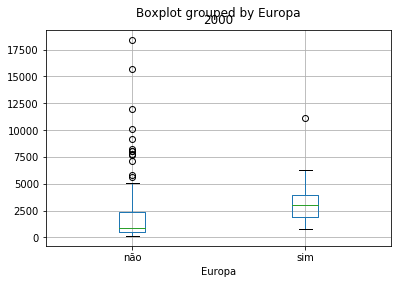

In [35]:
energia.boxplot(column="2000", by="Europa")


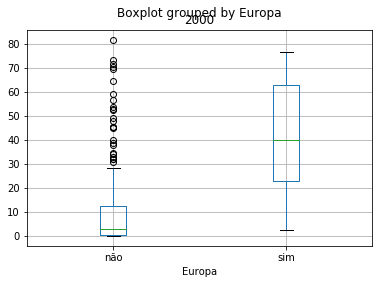

In [36]:
telefonia.boxplot(column="2000", by="Europa")


Podemos enxergar os mesmos dados via histogramas

array([<matplotlib.axes._subplots.AxesSubplot object at 0x122c29c18>,
      dtype=object)

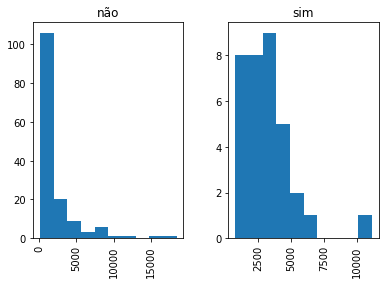

In [42]:
energia.hist(column="2000", by="Europa");


Podemos enxergar os mesmos dados via histogramas, agoa para telefonia

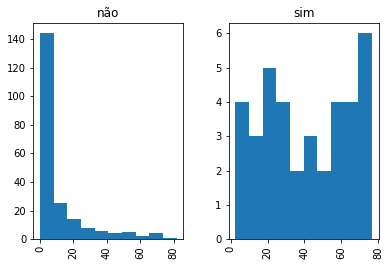

In [44]:
telefonia.hist(column="2000", by="Europa");

Para o mesmo ano, vamos fazer a **dispersão** comparando as duas tabelas e  os dois subgrupos

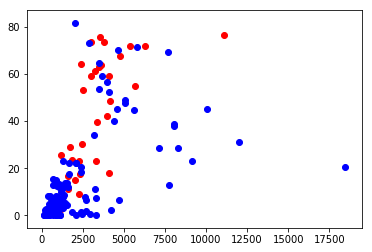

In [40]:
plt.scatter(energia.loc[energia.Europa=="sim","2000"], telefonia.loc[telefonia.Europa=="sim", "2000"], color="r")
plt.scatter(energia.loc[energia.Europa=="não","2000"], telefonia.loc[telefonia.Europa=="não", "2000"], color="b")

## Ajuste de retas

Vamos usar a função `reta` abaixo para traçar uma reta de ajuste para cada um dos subgrupos

In [51]:
def reta(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('x versus y')
    plt.xlabel('eixo x')
    plt.ylabel('eixo y')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()


Dispersão **mais** ajuste de retas

Ajuste linear entre X3 e X4:
Coeficiente linear: 14.278970484480439
Coeficiente angular: 0.008407681574289746
Ajuste linear entre X3 e X4:
Coeficiente linear: 3.6781607774086043
Coeficiente angular: 0.0034072153946948522


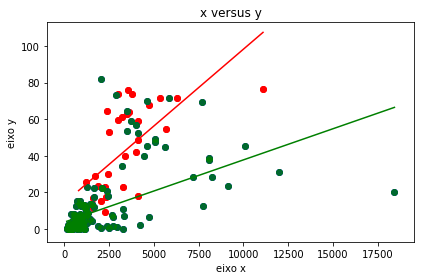

In [52]:
plt.scatter(energia.loc[energia.Europa=="sim","2000"], telefonia.loc[telefonia.Europa=="sim", "2000"], color="r")
reta(energia.loc[energia.Europa=="sim","2000"], telefonia.loc[telefonia.Europa=="sim", "2000"], "r")
plt.scatter(energia.loc[energia.Europa=="não","2000"], telefonia.loc[telefonia.Europa=="não", "2000"], color="b")
reta(energia.loc[energia.Europa=="não","2000"], telefonia.loc[telefonia.Europa=="não", "2000"], "g")


## Análise

O que os dados permitem concluir? Responsa usando:
* Análise visual dos boxplots e histogramas
* Análise do coeficiente angular da reta e do **coeficiente de correlação**